# Exemplo gráfico de ANOVA com teste de Tukey e gráficos de barras


Experimento hipotético realizado em esquema fatorial com dois fatores em delineamento inteiramente casualizado com quatro repetições. O fator 1 é o ambiente (Caatinga e Pastagem) e o fator 2 é a presença e ausência serrapilheira.

Fazer análise de variância aplicando o teste de Tukey e apresentar os resultados na forma de gráfico de barras.


In [1]:
# Pacotes ---------------------------------------------------------------
library('ExpDes.pt')
library('viridis')


Attaching package: ‘ExpDes.pt’

The following object is masked from ‘package:stats’:

    ccf

Loading required package: viridisLite


In [2]:
# Dados -----------------------------------------------------------------
df = read.csv('Data_Anova.csv', h=T)
df

Ambiente,Cobertura,reps,VaRes
<fct>,<fct>,<int>,<dbl>
Caat,SEM,1,20.5333
Caat,SEM,2,26.2000
Caat,SEM,3,27.2000
Caat,SEM,4,27.8667
Caat,COM,1,31.1333
Caat,COM,2,41.0667
Caat,COM,3,36.8000
Caat,COM,4,29.0000
Past,SEM,1,15.6000


In [3]:
# ANOVA
fat2.dic(fator1 = df$Ambiente, fator2 = df$Cobertura, resp = df$VaRes,
         quali = c(T, T), fac.names = c('Ambiente', 'Cobertura'))

------------------------------------------------------------------------
Legenda:
FATOR 1:  Ambiente 
FATOR 2:  Cobertura 
------------------------------------------------------------------------


Quadro da analise de variancia
------------------------------------------------------------------------
                   GL      SQ     QM     Fc     Pr>Fc
Ambiente            1  855.56 855.56 67.301 0.0000029
Cobertura           1   79.21  79.21  6.231 0.0281124
Ambiente*Cobertura  1   84.64  84.64  6.658 0.0240841
Residuo            12  152.55  12.71                 
Total              15 1171.96                        
------------------------------------------------------------------------
CV = 15.73 %

------------------------------------------------------------------------
Teste de normalidade dos residuos (Shapiro-Wilk)
valor-p:  0.2635604 
De acordo com o teste de Shapiro-Wilk a 5% de significancia, os residuos podem ser considerados normais.
---------------------------------------

# Interpretação dos resultados

- Distribuição normal;
- Houve interação significativa dos fatores. Na primeira tabela temos $Pr>Fc = 0.02408$, ou seja, na análise variância a interação foi significativa a 5\% de probabilidade;
- Obsevar as comparações das médias dentro de cada fator;
- Observe que as médias dos tratamentos se repetem nas tabelas subsequentes. Não confundir as letras das significâncias.


|             |Caatinga| Pastagem|
|-------------|--------|---------|
|Com cobertura|34.5Aa  |15.3Ba   |
|Sem cobertura|25.4Ab  |15.4Ba   |



In [4]:
# Letras significância. Opção: Letras maiúsculas para comparar áreas
# e minúsculas comparar cobertura
letras = c('Aa',      # Caatinga com cobertura
           'Ab',      # Caatinga sem cobertura
           'Ba',      # Pastagem com cobertura
           'Ba')      # Pastagem sem combertura

In [5]:
# Gráfico -------------------------------------------------------------

In [6]:
# Preparar médias para o gráfico
m1 = tapply(df$VaRes, list(Amb = df$Ambiente, Cobertura = df$Cobertura), mean)
m1

,COM,SEM
Caat,34.500,25.450
Past,15.275,15.425


In [7]:
# Transpor a matrix para colocar o ambiente nas colunas
m2 = t(m1)

In [8]:
# Renomear linhas e colunas da matrix
colnames(m2) = c('Caatinga', 'Pastagem')
rownames(m2) = c('Com', 'Sem')
m2

,Caatinga,Pastagem
Com,34.50,15.275
Sem,25.45,15.425


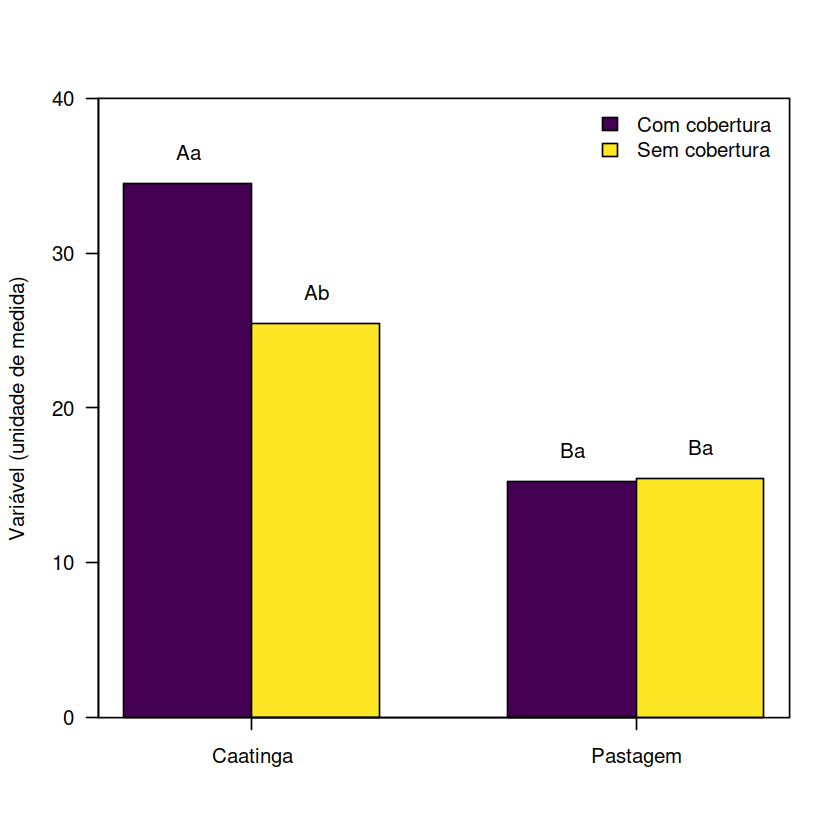

In [9]:
# Gráfico
cores = viridis(2) # Escolha as cores/paleta da sua preferência!

bp1 = barplot(m2, beside = T, col = cores, ylim = c(0, 40), las=1,
              ylab = 'Variável (unidade de medida)')
axis(side = 1, at = (bp1[1,] + bp1[2,])/2, labels = F)
box()

# Legenda
legend('topright', legend = c('Com cobertura', 'Sem cobertura'),
      fill = cores, bty = 'n')

# Letras significância
text(x = bp1,          # Posição em relação ao eixo x
     y = m2+2,         # Posição em relação ao eixo y (média + um valor!)
     labels = letras)  # Vetor com as letras criado anteriormente.
